In [102]:
#seth hensley
#80105592
#homework 1

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

alpha = .00000001
iterations = 300
dataset = pd.read_csv("C:\\Users\\shens\\Desktop\\Housing.csv")
dataset.head(),dataset.shape

(      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
 0  13300000  7420         4          2        3      yes        no       no   
 1  12250000  8960         4          4        4      yes        no       no   
 2  12250000  9960         3          2        2      yes        no      yes   
 3  12215000  7500         4          2        2      yes        no      yes   
 4  11410000  7420         4          1        2      yes       yes      yes   
 
   hotwaterheating airconditioning  parking prefarea furnishingstatus  
 0              no             yes        2      yes        furnished  
 1              no             yes        3       no        furnished  
 2              no              no        2      yes   semi-furnished  
 3              no             yes        3      yes        furnished  
 4              no             yes        2       no        furnished  ,
 (545, 13))

In [129]:
x1= dataset.values[:,1]
x2= dataset.values[:,2]
x3= dataset.values[:,3]
x4= dataset.values[:,4]
x10= dataset.values[:,10]
Y = dataset.values[:,0]

m = len(Y)

x0 = np.ones((m,1))
x1 =x1.reshape(m,1)
x2 =x2.reshape(m,1)
x3 =x3.reshape(m,1)
x4 =x4.reshape(m,1)
x10 =x10.reshape(m,1)

X = np.hstack((x0,x1,x2,x3,x4,x10))
#X,m


In [130]:
from sklearn.model_selection import train_test_split

xTrain,xTest,yTrain,yTest = train_test_split(X,Y,test_size = .2, random_state = 50)
mtrain = len(xTrain)
mtrain,xTrain

(436,
 array([[1.0, 1905, 5, 1, 2, 0],
        [1.0, 8250, 3, 1, 1, 2],
        [1.0, 4400, 4, 1, 2, 2],
        ...,
        [1.0, 5850, 2, 1, 1, 2],
        [1.0, 6615, 4, 2, 2, 1],
        [1.0, 3480, 3, 1, 2, 1]], dtype=object))

In [131]:
def findLoss(X, Y, theta):
    predictions = X.dot(theta) 
    errors = np.subtract(predictions, Y) 
    sqrErrors = np.square(errors) 
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

#error = findLoss(X, Y, theta)
#error

In [132]:
def gradientDescentLOSS(X, Y, theta, alpha, iterations,xTest,yTest):
    
    cost_history = np.zeros(iterations)
    cost_historyTest = np.zeros(iterations)
    for i in range(iterations): 
        predictions = X.dot(theta) 
        errors = np.subtract(predictions, Y) 
        sum_delta = (alpha / m) * X.transpose().dot(errors); 
        theta = theta - sum_delta;
        cost_history[i] = findLoss(X, Y, theta)
        cost_historyTest[i] = findLoss(xTest,yTest,theta)
    return theta, cost_history, cost_historyTest

In [133]:
theta = np.zeros(6)

thetaOUT, losshistory, lossValidation = gradientDescentLOSS(X, Y, theta, alpha, iterations,xTest,yTest)
thetaOUT,losshistory,lossValidation

(array([1.21920423801514, 855.7056999852314, 4.513547774432263,
        2.4889582218281685, 3.8445801902715804, 1.0274881739508228],
       dtype=object),
 array([7.08082115e+12, 4.23080593e+12, 2.88290375e+12, 2.24541933e+12,
        1.94392386e+12, 1.80133288e+12, 1.73389509e+12, 1.70200066e+12,
        1.68691630e+12, 1.67978221e+12, 1.67640814e+12, 1.67481237e+12,
        1.67405764e+12, 1.67370067e+12, 1.67353182e+12, 1.67345194e+12,
        1.67341414e+12, 1.67339624e+12, 1.67338776e+12, 1.67338372e+12,
        1.67338179e+12, 1.67338086e+12, 1.67338039e+12, 1.67338015e+12,
        1.67338002e+12, 1.67337993e+12, 1.67337987e+12, 1.67337982e+12,
        1.67337977e+12, 1.67337973e+12, 1.67337969e+12, 1.67337965e+12,
        1.67337961e+12, 1.67337957e+12, 1.67337952e+12, 1.67337948e+12,
        1.67337944e+12, 1.67337940e+12, 1.67337936e+12, 1.67337932e+12,
        1.67337928e+12, 1.67337924e+12, 1.67337920e+12, 1.67337916e+12,
        1.67337911e+12, 1.67337907e+12, 1.67337903e+1

In [134]:
lossP1 = losshistory.reshape(iterations,1)
losstest = lossValidation.reshape(iterations,1)
#lossP1

Text(0.5, 1.0, 'Convergence of gradient descent')

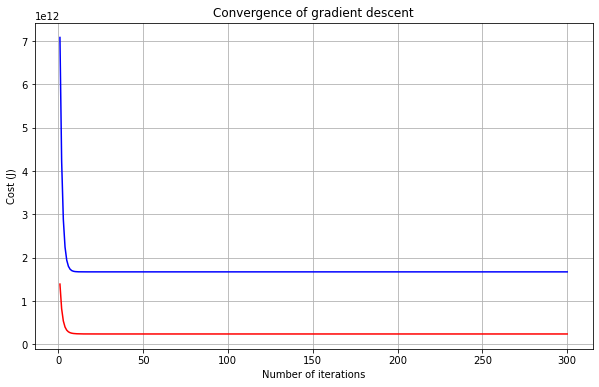

In [135]:
plt.plot(range(1, iterations + 1),lossP1, color='blue') 
plt.plot(range(1, iterations + 1),losstest, color='red') 

plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Cost (J)') 
plt.title('Convergence of gradient descent') 